In [81]:
import glob
from nilearn import plotting
import numpy as np
import pandas as pd
from nilearn.glm.second_level import SecondLevelModel



In [82]:
dir = '/Users/laurituominen/Downloads/Fz-maps'

files = glob.glob(f'{dir}/*.nii.gz')

HC = []
SCZ = []
for f in files: 
    if f.split('/')[-1].startswith('0'):
        HC.append(f)
    if f.split('/')[-1].startswith('5'):
        SCZ.append(f)


HC.sort()
SCZ.sort()

In [83]:
# make design matrices

design_matrix_HC = pd.DataFrame(
    [1] * len(HC),
    columns=["intercept"],
)

design_matrix_SCZ = pd.DataFrame(
    [1] * len(SCZ),
    columns=["intercept"],
)

group_effect = np.hstack(([1] * len(HC), [0] * len(SCZ)))
design_matrix_group = pd.DataFrame(
    {
        "HC vs SCZ": group_effect,
        "intercept": 1,
    }
)



In [84]:
# fit second level models 

second_level_model_HC = SecondLevelModel(smoothing_fwhm=12.0, n_jobs=2)
second_level_model_SCZ = SecondLevelModel(smoothing_fwhm=12.0, n_jobs=2)
second_level_model_GRP = SecondLevelModel(smoothing_fwhm=12.0, n_jobs=2)

second_level_model_HC = second_level_model_HC.fit(
    HC,
    design_matrix=design_matrix_HC
)

second_level_model_SCZ = second_level_model_SCZ.fit(
    SCZ,
    design_matrix=design_matrix_SCZ
)

ALL = HC + SCZ
second_level_model_group = second_level_model_GRP.fit(
    ALL, design_matrix=design_matrix_group
)

In [85]:
# compute contrasts

z_map_HC = second_level_model_HC.compute_contrast(
    second_level_contrast="intercept",
    output_type="z_score",
)

z_map_SCZ = second_level_model_SCZ.compute_contrast(
    second_level_contrast="intercept",
    output_type="z_score",
)

stat_maps_group = second_level_model_group.compute_contrast(
    "HC vs SCZ", 
    output_type="z_score"
)

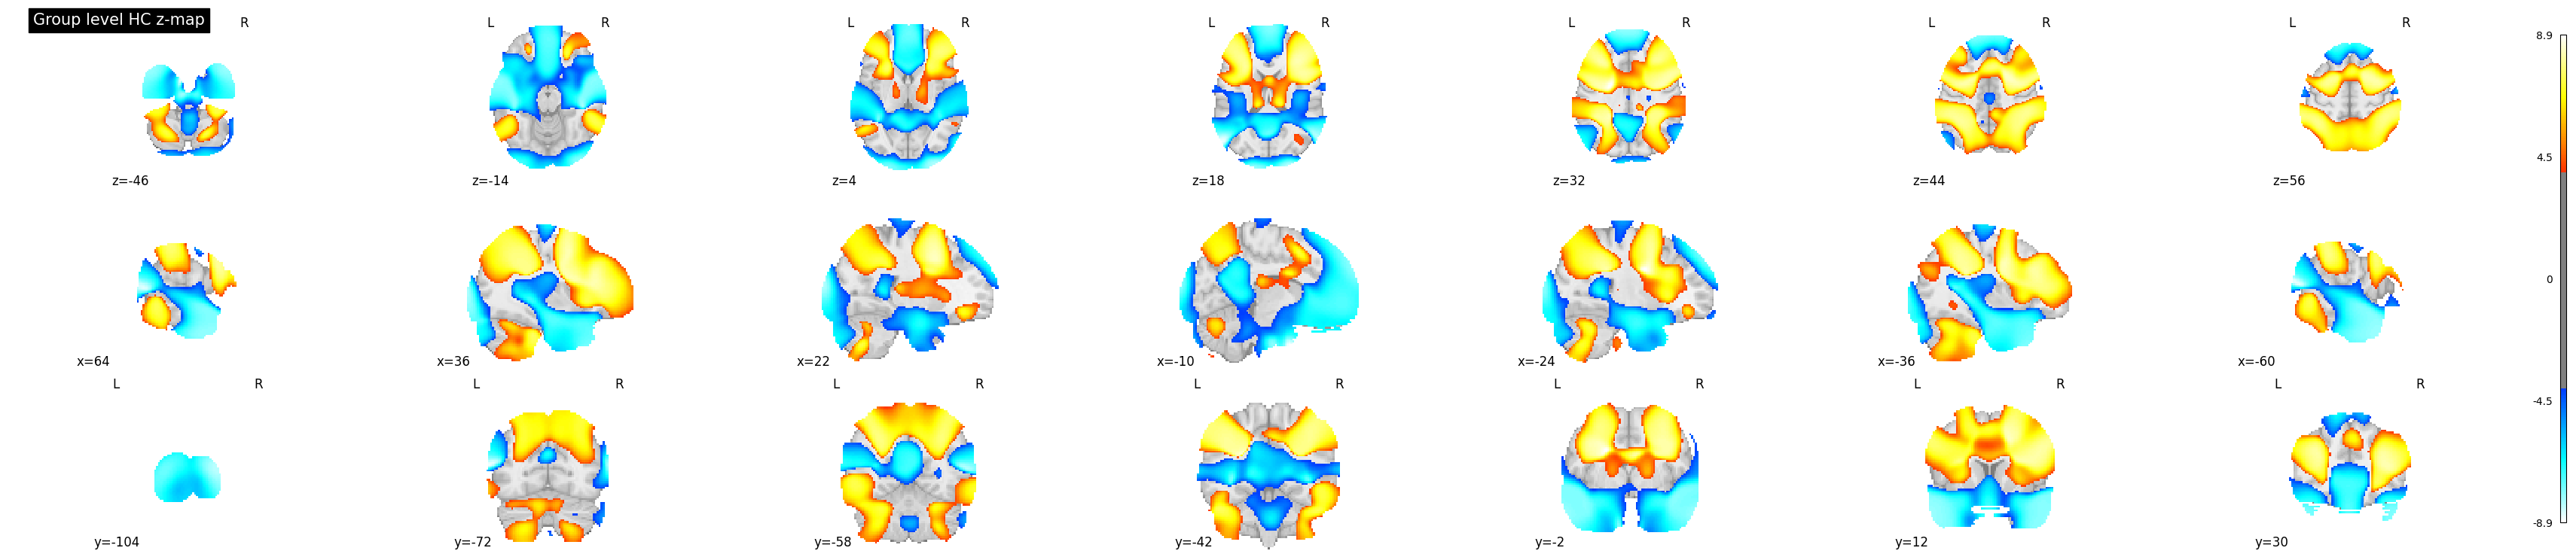

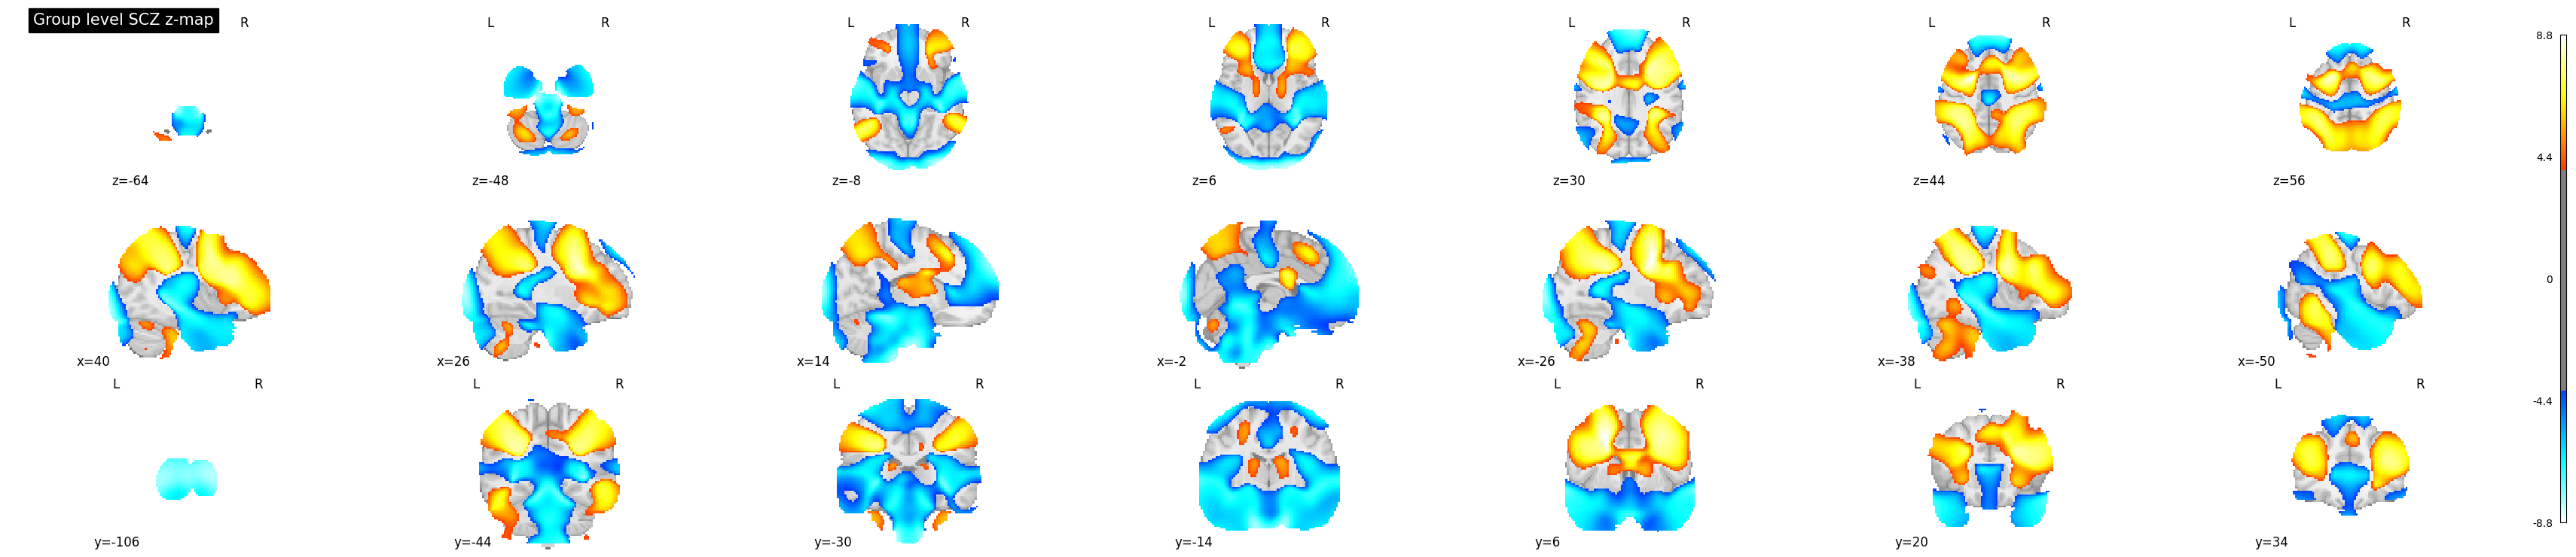

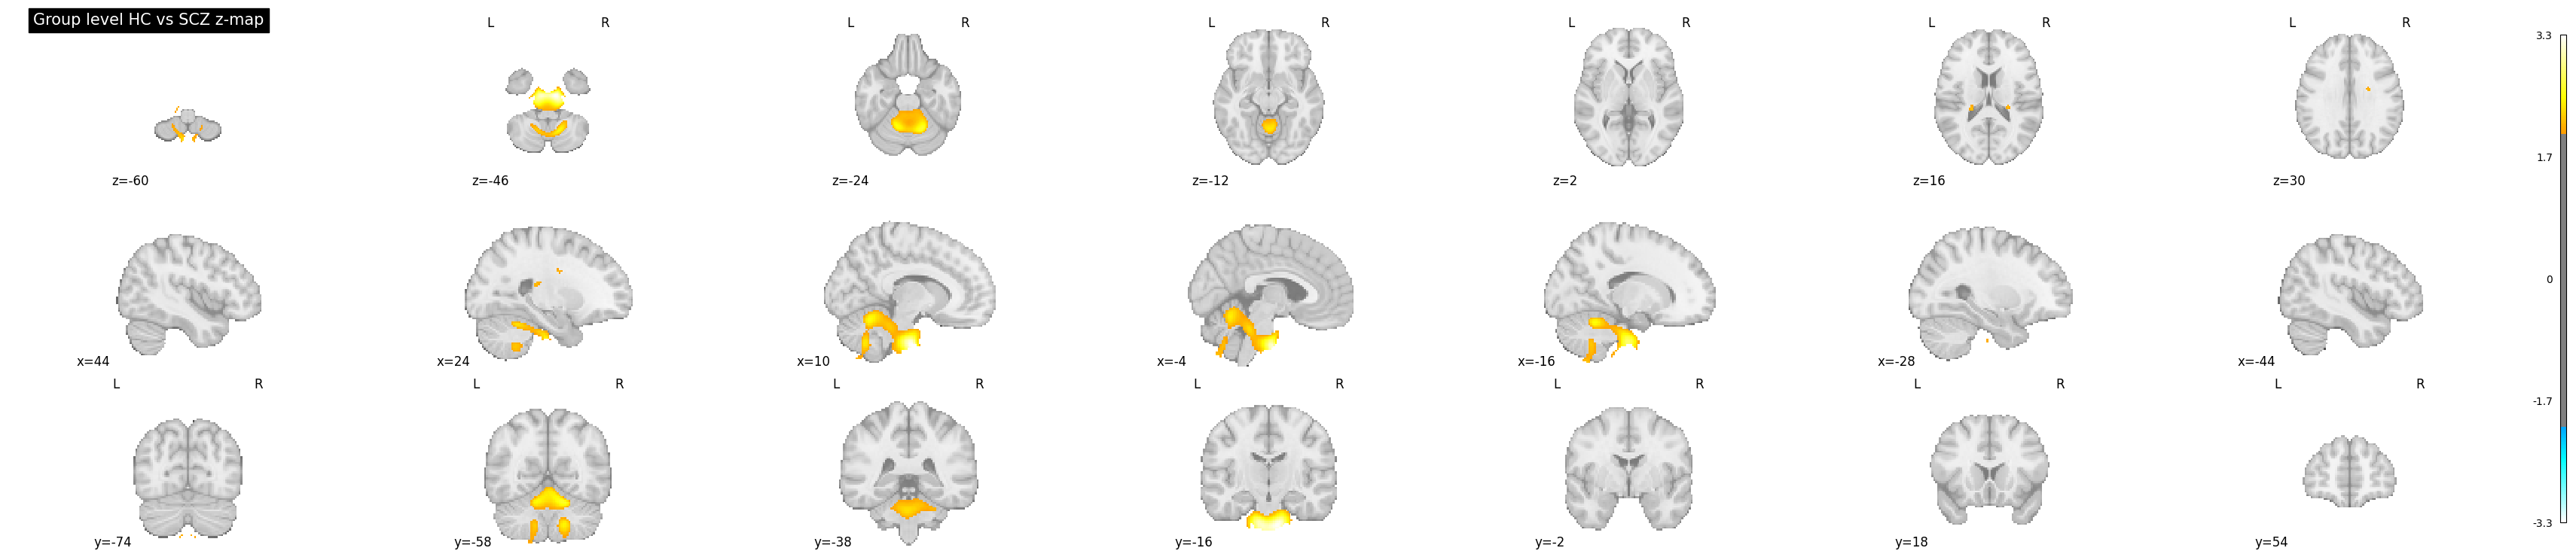

In [86]:
# plot and save the results
disp = plotting.plot_stat_map(z_map_HC, threshold=4, display_mode='mosaic', black_bg=False, title='Group level HC z-map');
disp.savefig('/Users/laurituominen/Downloads/Fz-maps/HC_zmap.png')

disp=plotting.plot_stat_map(z_map_SCZ, threshold=4, display_mode='mosaic', black_bg=False, title='Group level SCZ z-map');
disp.savefig('/Users/laurituominen/Downloads/Fz-maps/SCZ_zmap.png')

disp=plotting.plot_stat_map(stat_maps_group, threshold=2, display_mode='mosaic', black_bg=False, title='Group level HC vs SCZ z-map');
disp.savefig('/Users/laurituominen/Downloads/Fz-maps/Group_zmap.png')